# INFORMACIÓN:

- __AUTOR:__ Miguel Puente Ajovín y Maximiliano Greco
- __FECHA:__ Agosto-2015
- __PYTHON:__ 3.k

# INDICE:

- [DATOS](#DATOS)
    - [Número de Regiones y Variables: ](#Número-de-Regiones-y-Variables:)
    - [TASAS CRECIMIENTO](#TASAS-CRECIMIENTO)
    - [INDICES:](#INDICES:)
    - [SERIES FILTRADAS:](#SERIES-FILTRADAS:)
    - [VARIABLES AUXILIARES:](#VARIABLES-AUXILIARES:)


- [CORRELACIÓN:](#CORRELACIÓN:)
    - [RESÚMEN:](#RESÚMEN:)
    - [EXPORTAR:](#EXPORTAR:)



- [OUTLIERS:](#OUTLIERS:)
    - [REESTIMAR:](#REESTIMAR:)
        - [RESÚMEN:](#RESÚMEN:)
        - [EXPORTAR:](#EXPORTAR:)



- [FILTROS](#FILTROS:)
    - [HP](#FILTRO-HP)
        - [MCO HP-FILTER:](#MCO-HP-FILTER:)
    - [QT:](#FILTRO-QT:)

- [EVOLUCIÓN:](#EVOLUCIÓN:)

- [Apéndice:](#Apéndice:)


In [43]:
# python 3, compatibilidad:
from __future__ import division, unicode_literals, print_function, absolute_import
import os
from datetime import datetime
from numpy import *
import statsmodels.api as sm
import scipy as sp 
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import prettyplotlib as ppl

# Cambiamos el directorio de trabajo a la raíz

In [2]:
dir_raiz = u'/Users/mmngreco/Documents/repos/okun_ccaa/'
os.chdir(dir_raiz)
UTF = 'utf-8'

!open .

In [3]:
from def_utils import *

In [6]:
sns.set(style="white", color_codes=True)
# sns.set(style="ticks", palette="Set2")
sns.despine()
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [44]:
variables = ['empleo', 'paro', 'pib']

In [53]:
hoy = datetime.today()
hoy = str(hoy).replace(' ','_')

[🏠INDICE: ](#INDICE:)

# DATOS

In [32]:
d_tipo = 'indices'
for v in variables:
    globals()['d'+v] = pd.read_excel('data_work/indices/%s.xls' % v)

In [33]:
dwork = pd.concat([dempleo, dparo, dpib], keys=variables, axis=1)

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/index.py:1428: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)


In [34]:
dwork.head()

empleo                                                  \
            España   Andalucía      Aragón Asturias, Principado de   
tiempo         NaN         NaN         NaN                     NaN   
1976    100.000000  100.000000  100.000000              100.000000   
1977     98.962765   98.421573  100.086271               97.054294   
1978     97.420728   97.130121   97.571897               96.249014   
1979     96.079663   96.752329   96.367896               94.066735   

                                                               \
       Balears, Illes    Canarias   Cantabria Castilla y León   
tiempo            NaN         NaN         NaN             NaN   
1976       100.000000  100.000000  100.000000      100.000000   
1977       100.475004  103.619940   98.443078       96.762971   
1978       100.032749  105.810458  100.375781       95.414827   
1979       101.765769  106.544630   99.809504       94.183789   

                                                                          \
       Castilla - La Mancha    Cataluña Comunitat Valenciana Extremadura   
tiempo                  NaN         NaN                  NaN         NaN   
1976             100.000000  100.000000           100.000000  100.000000   
1977              99.329305   99.292999            99.894981   94.142675   
1978              97.561682   97.927958            99.719317   92.185599   
1979              93.457920   96.780255           100.332859   87.301529   

                                                           \
           Galicia Madrid, Comunidad de Murcia, Región de   
tiempo         NaN                  NaN               NaN   
1976    100.000000           100.000000        100.000000   
1977     98.027086            99.229413        101.658106   
1978     94.950759            95.832786        102.896965   
1979     93.348074            93.404236        100.046081   

                                                              paro            \
       Navarra, Comunidad Foral de  País Vasco   Rioja, La  España Andalucía   
tiempo                         NaN         NaN         NaN     NaN       NaN   
1976                    100.000000  100.000000  100.000000     NaN       NaN   
1977                    101.430164   99.224823  100.719795  5.1850   11.0725   
1978                    100.234731   96.803784   98.677794  6.9425   12.5175   
1979                     98.703724   94.882858   94.911045  8.6350   13.8450   

                                                                          \
        Aragón Asturias, Principado de Balears, Illes Canarias Cantabria   
tiempo     NaN                     NaN            NaN      NaN       NaN   
1976       NaN                     NaN            NaN      NaN       NaN   
1977    2.6850                  3.7675         4.1350   8.6175    3.5200   
1978    4.7850                  5.1075         4.3575   9.8850    4.4775   
1979    6.4775                  7.3400         4.8300  10.6250    5.4975   

                                                                           \
       Castilla y León Castilla - La Mancha Cataluña Comunitat Valenciana   
tiempo             NaN                  NaN      NaN                  NaN   
1976               NaN                  NaN      NaN                  NaN   
1977             4.235               4.5200   3.8325               3.6600   
1978             5.275               6.0225   6.1250               4.7600   
1979             6.725               7.6650   7.9925               6.6425   

                                                                   \
       Extremadura Galicia Madrid, Comunidad de Murcia, Región de   
tiempo         NaN     NaN                  NaN               NaN   
1976           NaN     NaN                  NaN               NaN   
1977        8.4825  1.8550               5.2425            5.0900   
1978       10.2650  2.5400               8.2900            6.0375   
1979       13.4850  3.4025              10.3775         

In [35]:
dwork.tail()

empleo                                                  \
          España   Andalucía      Aragón Asturias, Principado de   
2011  144.840170  158.881044  128.859478               94.721236   
2012  138.638999  150.782122  127.926351               90.326176   
2013  134.771433  146.047580  120.648931               87.192589   
2014  136.380682  149.608844  121.605666               88.821339   
2015  140.426871  156.697426  127.158924               88.158414   

                                                             \
     Balears, Illes    Canarias   Cantabria Castilla y León   
2011     204.872106  197.099380  133.318671      108.332675   
2012     207.900451  190.660170  130.053488      104.048391   
2013     209.565487  187.116418  123.527704       99.807244   
2014     212.524767  189.453785  125.310230      100.194245   
2015     227.103393  198.845949  127.212617      102.006782   

                                                                        \
     Castilla - La Mancha    Cataluña Comunitat Valenciana Extremadura   
2011           145.624344  150.877317           152.528942  106.832279   
2012           134.925443  142.640584           145.544883   97.102962   
2013           132.087988  139.764620           142.945748   97.210588   
2014           132.064553  142.651026           145.335299  101.255395   
2015           132.619998  144.977880           151.280662  103.025223   

                                                        \
        Galicia Madrid, Comunidad de Murcia, Región de   
2011  88.431241           185.398932        183.589989   
2012  85.009254           180.815934        177.958311   
2013  81.702236           174.337720        173.793302   
2014  81.022947           174.215231        178.944116   
2015  81.968484           183.069901        176.161344   

                                                             paro            \
     Navarra, Comunidad Foral de  País Vasco   Rioja, La   España Andalucía   
2011                  160.248891  126.366610  140.206955  21.6375   30.3875   
2012                  153.645326  119.300915  132.177329  25.0275   34.5925   
2013                  148.263964  115.446074  130.218169  26.3575   36.3375   
2014                  150.762982  114.363813  134.114412      NaN       NaN   
2015                  151.679726  115.212323  135.537911      NaN       NaN   

                                                                         \
       Aragón Asturias, Principado de Balears, Illes Canarias Cantabria   
2011  17.0925                 17.8550        21.9625  29.6900   15.2925   
2012  18.5800                 21.7550        23.2625  33.0025   17.7250   
2013  21.3325                 24.0375        22.3800  34.0650   20.5850   
2014      NaN                     NaN            NaN      NaN       NaN   
2015      NaN                     NaN            NaN      NaN       NaN   

                                                                         \
     Castilla y León Castilla - La Mancha Cataluña Comunitat Valenciana   
2011         16.7350              22.9225  19.2500              24.4875   
2012         19.7400              28.4750  22.6525              27.6550   
2013         21.7375              30.1100  23.3700              28.6125   
2014             NaN                  NaN      NaN                  NaN   
2015             NaN                  NaN      NaN                  NaN   

                                                                  \
     Extremadura  Galicia Madrid, Comunidad de Murcia, Región de   
2011     25.0975  17.4075              16.7300           25.4025   
2012     33.0375  20.6650              18.9875           27.8875   
2013     33.6950  22.0750              20.2375           29.3725   
2014         NaN      NaN                  NaN               NaN   
2015         NaN      NaN                  NaN               NaN   

                                                              pib              \
 

In [36]:
dwork.dropna(axis=0, how='any', inplace=True)

In [37]:
dwork.head()

empleo                                                               \
         España  Andalucía     Aragón Asturias, Principado de Balears, Illes   
1980  93.465515  92.927827  93.771202               92.292505      98.980529   
1981  91.058134  91.183527  90.672381               89.363463      95.049024   
1982  90.218963  91.532938  91.229616               85.607570      94.418912   
1983  89.750160  91.493362  91.115750               85.004760      96.955407   
1984  87.371813  84.647889  87.999507               82.547703      97.932792   

                                                                             \
        Canarias  Cantabria Castilla y León Castilla - La Mancha   Cataluña   
1980  105.050183  97.611387       93.029685            90.161129  93.578697   
1981  101.283297  95.745806       91.172635            87.228499  91.068169   
1982   99.593609  90.018992       89.390048            88.986436  88.112648   
1983  101.442928  89.204198       88.735719            89.942407  85.630517   
1984  100.274291  88.199671       86.246936            87.592835  84.971253   

                                                                       \
     Comunitat Valenciana Extremadura    Galicia Madrid, Comunidad de   
1980            96.685998   86.315556  90.329595            93.037726   
1981            92.298128   85.360899  88.163908            92.042630   
1982            90.406271   85.194632  88.326580            93.867227   
1983            90.698133   87.999335  88.850490            92.812809   
1984            89.480471   76.704382  87.831342            91.364489   

                                                                          \
     Murcia, Región de Navarra, Comunidad Foral de País Vasco  Rioja, La   
1980         94.555719                   95.762477  92.217320  95.191726   
1981         91.887880                   93.745358  89.228981  93.141806   
1982         92.494977                   93.677619  87.034000  90.916845   
1983         89.627896                   92.825040  86.367822  89.523369   
1984         91.943788                   90.387822  85.032712  82.969340   

         paro                                                            \
       España Andalucía   Aragón Asturias, Principado de Balears, Illes   
1980  11.4150   17.4100   8.6175                  8.4075         8.0100   
1981  14.0300   19.7950  11.7900                 11.7525         9.9725   
1982  15.8450   20.5375  12.2125                 13.7075        11.7450   
1983  17.3275   22.4125  13.6825                 13.8950        13.9275   
1984  20.0800   28.9050  15.1900                 15.6600        14.0475   

                                                                       \
     Canarias Cantabria Castilla y León Castilla - La Mancha Cataluña   
1980  12.3225    7.4700          8.4500              10.6575  12.2325   
1981  16.2275   10.3125         10.3725              13.9500  15.3950   
1982  18.2175   12.4175         12.1575              13.7325  19.1550   
1983  19.1100   12.6075         13.5575              14.0825  21.0750   
1984  22.3525   15.9850         15.9875              16.2750  21.7375   

                                                                     \
     Comunitat Valenciana Extremadura  Galicia Madrid, Comunidad de   
1980               9.7100     14.9875   5.0125              12.5350   
1981              13.3325     16.5075   6.1200              14.3525   
1982              16.7650     17.3825   7.5200              14.5000   
1983              17.2675     16.3475   9.8900              16.7025   
1984              19.4900     26.5225  11.6050              19.3875   

                                                                         \
     Murcia, Región de Navarra, Comunidad Foral de País Vasco Rioja, La   
1980            9.8225                     11.8700    12.3775    5.1975   
1981           12.5500                     13.0300    15.7150    7.4525   
1982         

- [mco](#SERIES-ESTACIONARIAS:)

[🏠INDICE: ](#INDICE:)

## VARIABLES AUXILIARES:

In [38]:
regiones = dwork['empleo'].columns # variable con los nombres de las ccaa
foot = u'FUENTE: Datos obtenidos de la web: INE.es, \nElaboración propia: Maximiliano Greco, @mmngreco' 

[🏠INDICE: ](#INDICE:)

In [39]:
# con matplotlib
# fig = plt.figure(figsize=(15,15))
# data.du.boxplot(rot=90, ax=fig.add_subplot(311))
# data.dl.boxplot(rot=90, ax=fig.add_subplot(312))
# data.dy.boxplot(rot=90, ax=fig.add_subplot(313))

# plt.tight_layout()

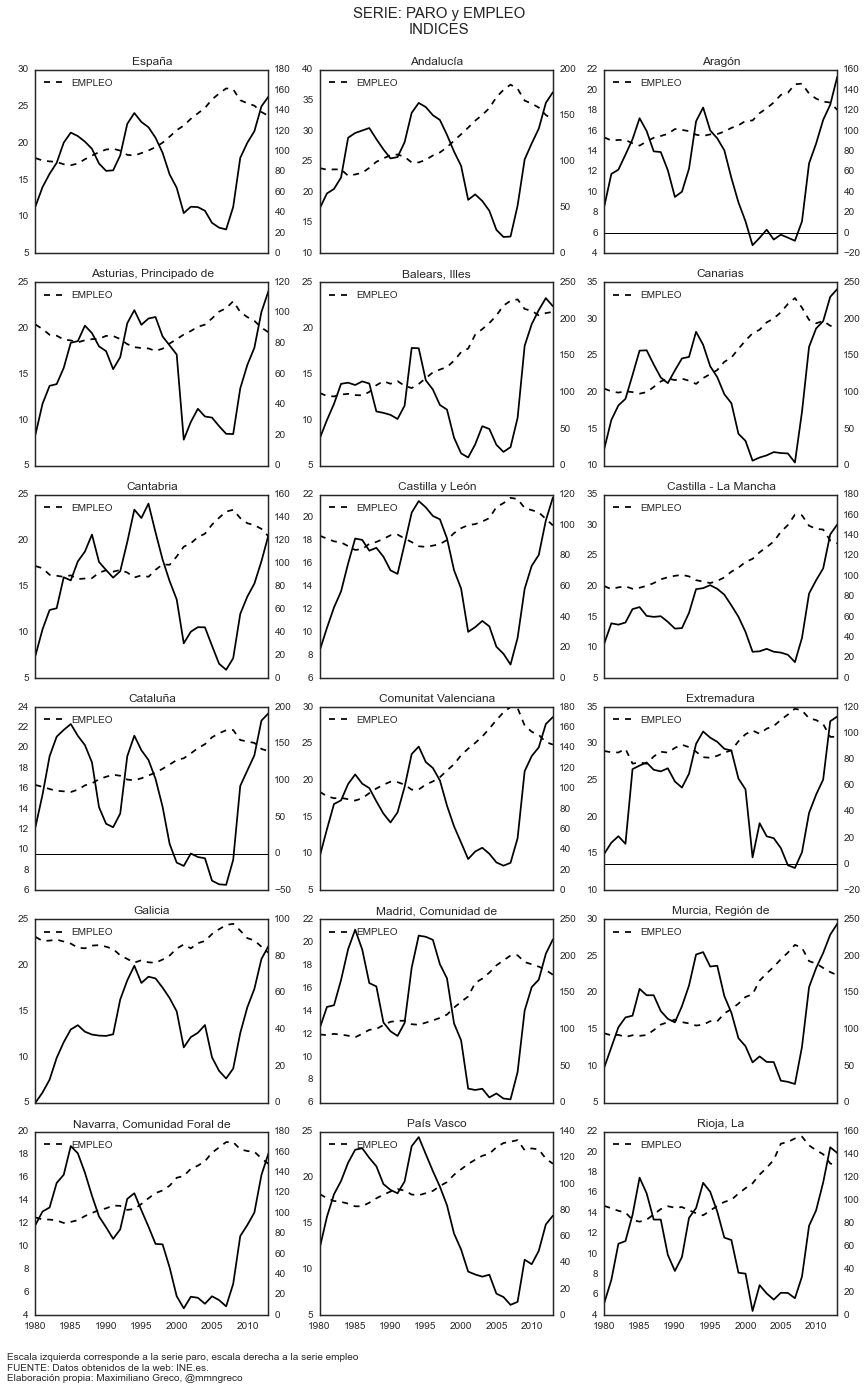

In [54]:
# PARAMETROS DEL GRÁFICO
id_x = 0
x = ['paro', 'empleo']
y = 'pib'
data = dwork
foot1 = '''Escala izquierda corresponde a la serie %s, escala derecha a la serie %s
FUENTE: Datos obtenidos de la web: INE.es.
Elaboración propia: Maximiliano Greco, @mmngreco''' % (x[0], x[1])

c = 'black'
try:
    ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), nombre_xls[id_xls])
    file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], nombre_xls[id_xls], hoy)
except:
    ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), d_tipo.upper())
    file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], d_tipo.upper(), hoy)

######## 

fig = plt.figure(figsize=(12,18))

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
    data[x[0]][reg].plot(ax=ax, label=x[0].upper(), color=c, sharex=True)
    data[x[1]][reg].plot(ax=ax, linestyle='--', label=x[1].upper(), secondary_y=True, color=c, sharex=True)
    plt.axhline(y=0, color='black', linewidth=1, axes=ax)
    plt.title(reg)
    plt.legend(loc='upper left')

plt.gcf().text(0, -0.03, "%s" % foot1, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.03)
# plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


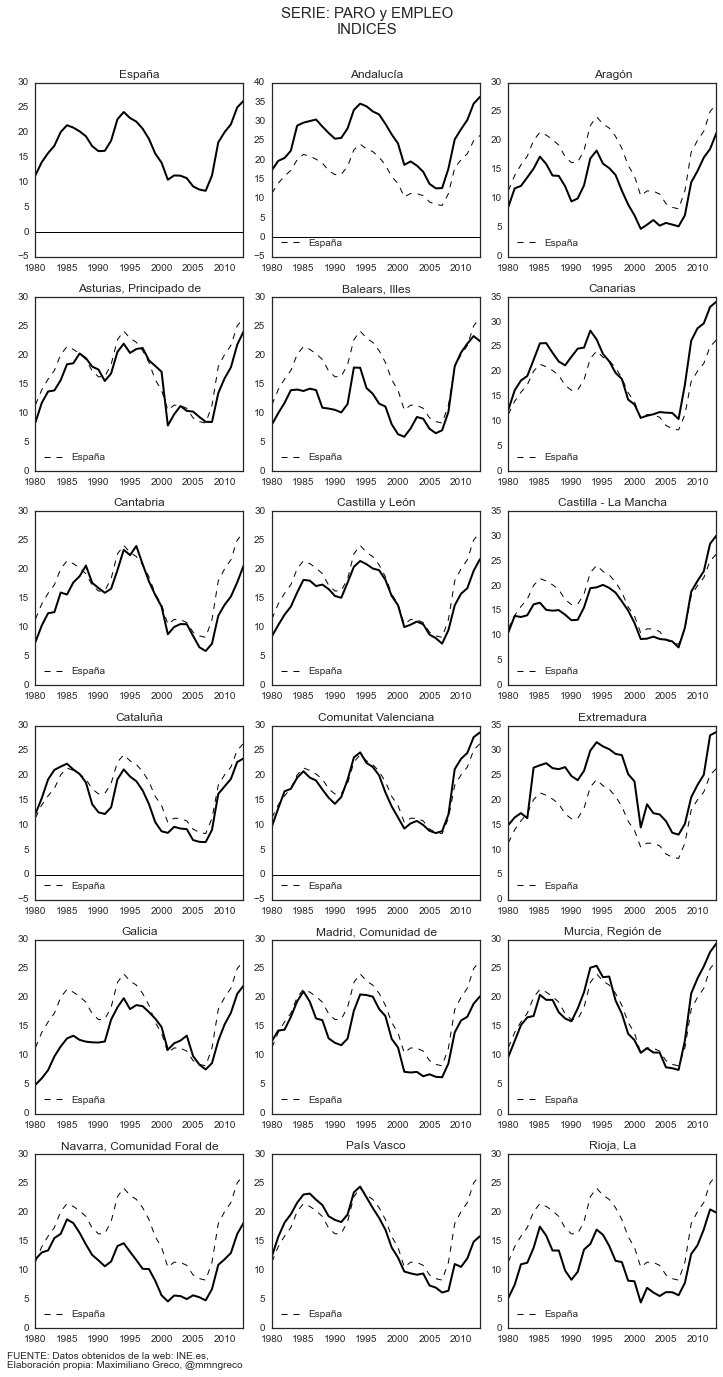

In [56]:
# PARAMETROS DEL GRÁFICO
id_x = 0
x = ['paro', 'empleo']
y = 'pib'
data = dwork
try:
    ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), nombre_xls[id_xls])
    file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], nombre_xls[id_xls], hoy)
except:
    ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), d_tipo.upper())
    file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], d_tipo.upper(), hoy)
c = 'black'
######## 

fig = plt.figure(figsize=(10,18))

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
    if i > 0:
        data[x[id_x]]['España'].plot(ax=ax, linewidth=1, linestyle='--', color=c, label='España')
    else:
        pass
    data[x[id_x]][reg].plot(ax=ax, linewidth=2, color=c, label='')
    plt.axhline(y=0, color=c, linewidth=1)
    plt.title(reg)
    plt.legend(loc='lower left')
plt.gcf().text(0, -0.01, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.04)
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)

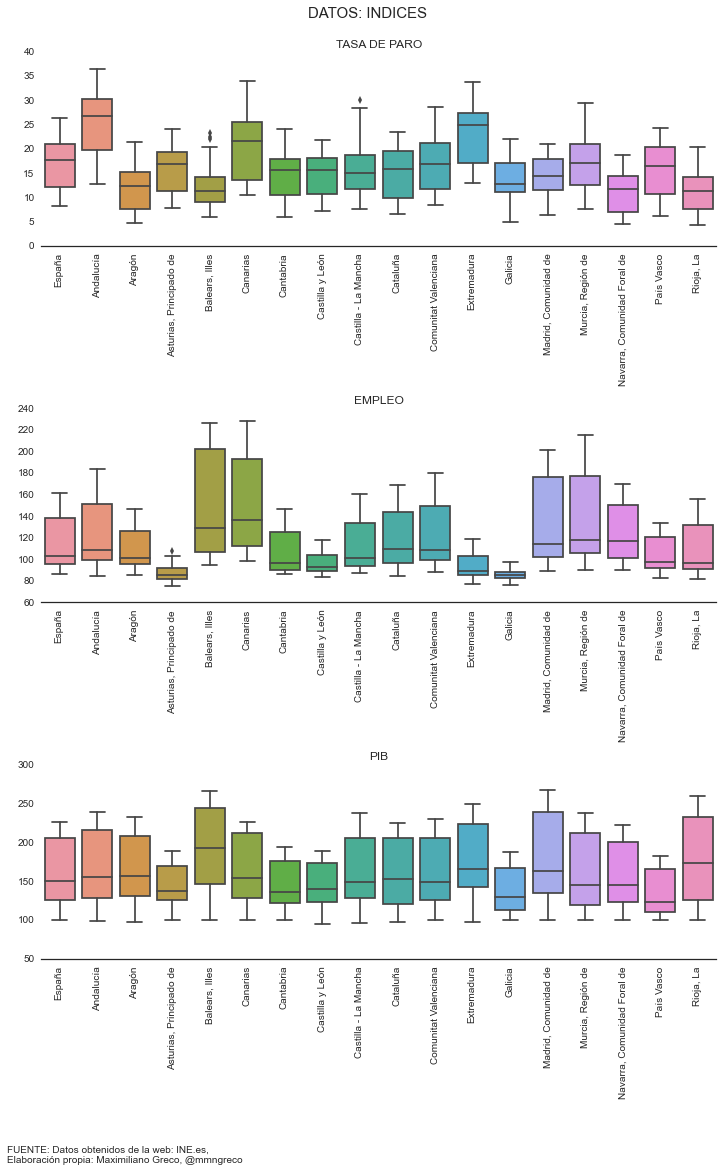

In [58]:
# i = id_xls
data = dwork
try:
    ttl = 'DATOS: %s' % (nombre_xls[id_xls])
    file_name = 'boxplot_%s_%s.png' % (nombre_xls[id_xls], hoy)
except:
    ttl = 'DATOS: %s' % (d_tipo.upper())
    file_name = 'boxplot_%s_%s.png' % (d_tipo.upper(), hoy)


# con seaborn
fig = plt.figure(figsize=(10,15))
sns.set_palette('Greys')

g1 = sns.boxplot(data=data.paro, fliersize=5, width=.8, ax=fig.add_subplot(311))
g1.set_xticklabels(data.paro.columns, rotation=90)
g1.set_title('TASA DE PARO')

g2 = sns.boxplot(data=data.empleo, fliersize=5, width=.8, ax=fig.add_subplot(312))
g2.set_xticklabels(data.empleo.columns, rotation=90)
g2.set_title('EMPLEO')

g3 = sns.boxplot(data=data.pib, fliersize=5, width=.8, ax=fig.add_subplot(313))
g3.set_xticklabels(data.pib.columns, rotation=90)
g3.set_title('PIB')

sns.despine(left=True)

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

# CORRELACIÓN:

[Este análisis](#CORRELACIÓN:) nos dará una idea de como son, según los datos, las relaciones entre ambas variables, y su intensidad. En teoría, esperamos que la correlación entre la tasa de paro y el PIB sea __negativa__, es decir, cuanto más aumente PIB, el efecto esperado sobre la tasa de paro es que disminuya.

Veamos que sucede:

[🏠INDICE: ](#INDICE:)

In [59]:
id_x = 1
x = ['paro', 'empleo']
y = 'pib'
dwork[x[id_x]].corrwith(dwork[y], axis=0).order(ascending=True)

Galicia                        0.426284
Asturias, Principado de        0.647403
Castilla y León                0.866382
Extremadura                    0.871936
Rioja, La                      0.923769
Cantabria                      0.925977
Balears, Illes                 0.943442
Aragón                         0.953152
Castilla - La Mancha           0.966352
España                         0.970748
Andalucía                      0.972964
Comunitat Valenciana           0.975824
Cataluña                       0.978118
Canarias                       0.979280
Madrid, Comunidad de           0.979553
País Vasco                     0.982183
Murcia, Región de              0.983410
Navarra, Comunidad Foral de    0.990606
dtype: float64

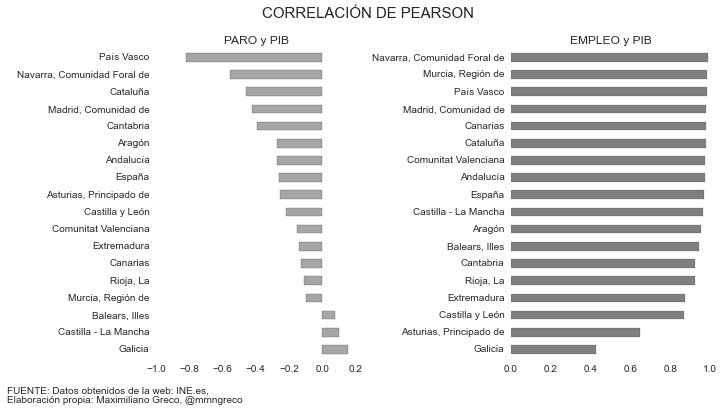

In [60]:
data = dwork

try:
    ttl = 'CORRELACIÓN DE PEARSON\n%s' % nombre_xls[id_xls]
    file_name = 'corr_%s_%s.png' % (nombre_xls[id_xls], hoy)
except:
    ttl = 'CORRELACIÓN DE PEARSON\n%s' % d_tipo.upper()
    file_name = 'corr_%s_%s.png' % (d_tipo.upper(), hoy)

x = ['paro', 'empleo']
y = 'pib'

# ----------------------------

plt.figure(figsize=(10,5))

axs = [plt.subplot(121)]
data[x[0]].corrwith(data[y], axis=0).order(ascending=False).plot(kind='barh', color='grey', alpha=0.7)
plt.gca().set_title('%s y %s' % (x[0].upper(), y.upper()))

axs += [plt.subplot(122)]
data[x[1]].corrwith(data[y], axis=0).order(ascending=True).plot(kind='barh', color='black', alpha=0.5)
plt.gca().set_title('%s y %s' % (x[1].upper(), y.upper()))

plt.suptitle('CORRELACIÓN DE PEARSON', fontsize=15, x=0.5, y=1.05)

# Quitar las líneas del marco del eje.

for i, ax in enumerate(axs):
    if i == 1:
        ax.axes.get_yaxis().set_visible(True)
        ax.tick_params(labelleft='off')
        plt.ylabel('')
        ax.yaxis.tick_right()
    else:
        ax.axes.get_yaxis().set_visible(True)

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)

    ax.tick_params(axis='both',
                   which='both',
                   bottom='off',
                   top='off',
                   left='off',
                   labelbottom='on')

    
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

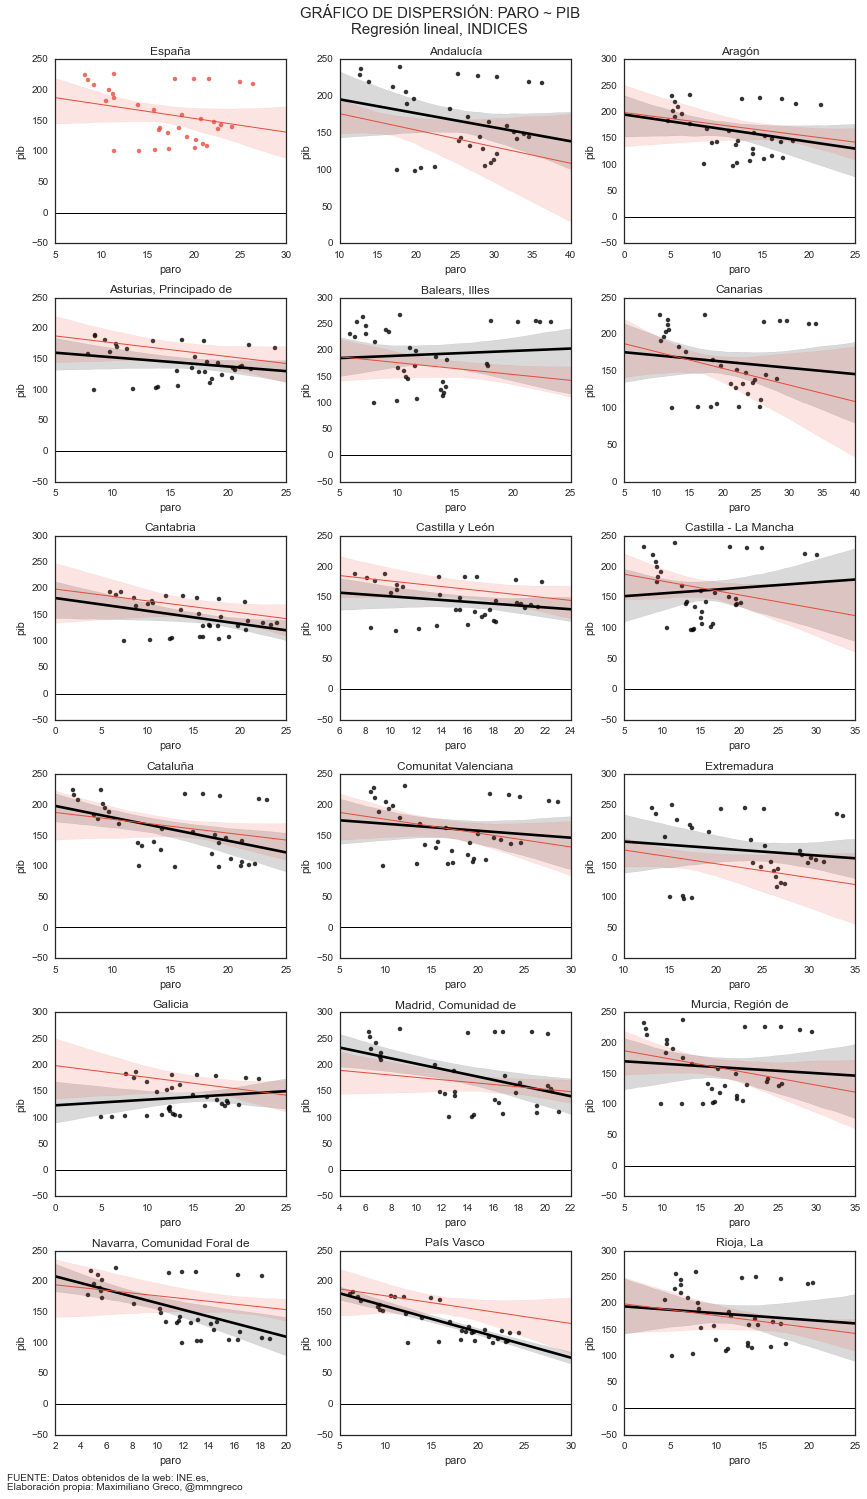

In [62]:
# PARAMETROS DEL GRÁFICO
id_x = 0
x = ['paro', 'empleo']
y = 'pib'
data = dwork

try:
    ttl = 'GRÁFICO DE DISPERSIÓN: %s ~ %s\nRegresión lineal, %s' % (x[id_x].upper(), y.upper(), nombre_xls[id_xls])
    file_name = 'reg%s_%s_%s_%s.png' % (x[id_x].upper(), y.upper(), nombre_xls[id_xls], hoy)
except:
    ttl = 'GRÁFICO DE DISPERSIÓN: %s ~ %s\nRegresión lineal, %s' % (x[id_x].upper(), y.upper(), d_tipo.upper())
    file_name = 'reg%s_%s_%s_%s.png' % (x[id_x].upper(), y.upper(), d_tipo.upper(), hoy)


######## 

fig = plt.figure(figsize=(12,20))

for i, reg in enumerate(regiones):
    if reg == 'España':
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color="#e74c3c", line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)

    else:
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color='black')
        sns.regplot(y=data[y]['España'], 
                    x=data[x[id_x]]['España'], 
                    ax=ax, 
                    color="#e74c3c", 
                    scatter=False, 
                    line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)
    g.set_xlabel(x[id_x])
    g.set_ylabel(y)
    g.set_title(reg)

plt.gcf().text(0, -0.01, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.02)

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

# MODELO MCO: 

## TASA PARO:

### MODELO A ESTIMAR:
### $$ (y - y^*) = \beta_0 + \beta_1(u - u^*) $$

donde:

- __$y$__ = Tasa de crecimiento interanual.
- __$y^*$__ = Tasa de crecimiento natural.
- __$u$__ = Tasa de paro.
- __$u^*$__ = Tasa de paro natual.
- __$\beta_0$__ = Término Independiente.
- __$\beta_1$__ = Efecto de $(u-u^*)$ sobre $(y-y^*)$.


## UMBRAL DE CRECIMIENTO:

- PARO
- EMPLEO

El umbral de crecimiento de una economía, es la interpretación más util que nos dá el modelo de Okun. Nos dice cuanto tiene que crecer la economía para comenzar a crear empleo o reducir la tasa de paro.

__Se obtiene a partir del modelo de Okun:__

### $$ (y - y^*) = \beta_0 + \beta_1(u - u^*) $$

Tal y como está enunciado, el umbral de crecimiento lo obtenemos cuando $(u - u^*) = 0$, por tanto:

$$ (y - y^*) = \beta_0 + \beta_1(u - u^*) $$

$$ (y - y^*) = \beta_0 $$




[🏠INDICE: ](#INDICE:)

# RESÚMEN:

In [63]:
# Fit and summarize OLS model
id_x = 0
x = ['paro', 'empleo']
y = 'pib'
v = x[id_x]

In [64]:
data['paro'] = data['paro'] / 100

s, p, m = estimar_mco(data, exogena=v, endogena=y, regiones=regiones)

resumen_mco(p, 1)

,$β_0$,$pv_{β_0}$,$β_1$,$pv_{β_1}$,$R^2$
"Balears, Illes",180.342991,1.207065e-07,90.581979,6.543378e-01,0.006343
"Murcia, Región de",174.096006,1.078913e-07,-77.929385,5.819500e-01,0.009575
Castilla - La Mancha,147.034756,2.136863e-06,90.595276,5.665361e-01,0.010373
"Rioja, La",193.847034,7.776151e-09,-129.344880,5.347190e-01,0.012159
Canarias,179.996922,3.030084e-08,-85.028088,4.670685e-01,0.016648
Extremadura,200.918229,1.092215e-06,-109.210983,4.385156e-01,0.018870
Comunitat Valenciana,180.341403,1.013070e-08,-113.536383,3.961786e-01,0.022591
Galicia,123.133764,3.040477e-08,107.669032,3.754967e-01,0.024621
Castilla y León,166.299393,3.060845e-10,-150.047478,2.169706e-01,0.047229
"Asturias, Principado de",167.609008,1.661697e-11,-150.384146,1.450657e-01,0.065174


[🏠INDICE: ](#INDICE:)

# EXPORTAR:

In [27]:
# guardar_mco(sumrz_paro, 'modelos_u')

# guardar_mco(sumrz_empleo, 'modelos_l')

[🏠INDICE: ](#INDICE:)

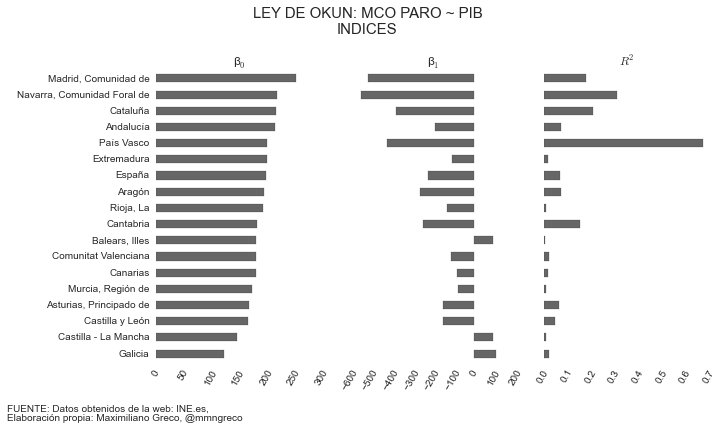

In [66]:
# PARAMETROS DEL GRÁFICO

id_x = 0
x = ['paro', 'empleo']
y = 'pib'
v = x[id_x]

data = dwork.copy(deep=True)
s, p, m = estimar_mco(data, exogena=v, endogena=y, regiones=regiones)
data = resumen_mco(p, 0) 

fig = plt.figure(figsize=(10,5))

try:
    ttl = 'LEY DE OKUN: MCO %s ~ PIB\n%s' % (x[id_x].upper(), nombre_xls[id_xls])
    file_name = 'res_mco_%s_%s_%s.png' % (x[id_x].upper(), nombre_xls[id_xls], hoy)
except:
    ttl = 'LEY DE OKUN: MCO %s ~ PIB\n%s' % (x[id_x].upper(), d_tipo.upper())
    file_name = 'res_mco_%s_%s_%s.png' % (x[id_x].upper(), d_tipo.upper(), hoy)

color = 'black'
alpha = 0.6
linestyle = '--'


id_c = 0
ordenar_por = data.columns[id_c]
data.sort(ordenar_por, ascending=True, inplace=True)

######## 


ax1 = plt.subplot(1,3,1)
data.b0.plot(kind='barh', title='β$_0$', color=color, alpha=alpha, sharey=True)
#data.b0.order(ascending=False).plot(kind='barh', title='β$_0$', color=color, alpha=alpha)
plt.xticks(rotation=60)
#plt.axvline(data.b0.T['España'], linestyle=linestyle)

ax2 = plt.subplot(1,3,2)
data.b1.plot(kind='barh', title='β$_1$', color=color, alpha=alpha, sharey=True)
#data.b1.order(ascending=False).plot(kind='barh', title='β$_1$', color=color, alpha=alpha)
#plt.axvline(data.b1.T['España'], linestyle=linestyle)
plt.xticks(rotation=60)

ax3 = plt.subplot(1,3,3)
data['R2'].plot(kind='barh', title='$R^2$', color=color, alpha=alpha, sharey=True)
#data['R2'].order(ascending=False).plot(kind='barh', title='$R^2$', color=color, alpha=alpha)
#plt.axvline(data['R2'].T['España'], linestyle=linestyle)
plt.xticks(rotation=60)

for ax in [ax1, ax2, ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True)

    ax.tick_params(axis='both',
                   which='both',
                   bottom='off',
                   top='off',
                   left='off',
                   labelbottom='on',
                   labelleft='on')

plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.suptitle(x=0.5, y=1.1, t=ttl, fontsize=15)
plt.tight_layout()

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

[🏠INDICE: ](#INDICE:)

[🏠INDICE: ](#INDICE:)

## CONTRASTE DE RAÍZ UNITARIA: 

- __$H_0$__: Tiene raíz unitaria, 
- __$H_1$__: No tiene raíz unitaria

In [34]:
id_v = 1  #    0       1       2 
variables = ['pib', 'paro', 'empleo']
v = variables[id_v]

rango = range(5)
rango = [4]

print('CONTRASTE DE DICKEY-FULLER')

for i in rango:
    
    il = i
    iy = i
    iu = i
    
    print('\nVARIABLE:', v.upper())
    try:
        dl = dempleo[il]
        dy = dpib[iy]
        du = dparo[iu]
        print('HOJA: {:^30}'.format(nombre_xls[i]))
    except:
        print('HOJA: {:^30}'.format(d_tipo))
    print('=' * 40)
    
    data = crear_df([dl, du, dy])
    for reg in regiones:
        try:
            pv = sm.tsa.stattools.adfuller(data[v][reg].dropna(axis=0), regression='c', autolag='BIC')[1]
        except:
            continue

        if pv < 0.05:
            print('{:25}\t{:4.3f}\t***'.format(reg, pv))
        else:
            print('{:25}\t{:4.3f}\t'.format(reg, pv))
            
    print('-' * 40)

CONTRASTE DE DICKEY-FULLER

VARIABLE: PARO
HOJA:            HPtrend            
España                   	0.082	
Andalucía                	0.157	
Aragón                   	0.179	
Asturias, Principado de  	0.610	
Balears, Illes           	0.033	***
Canarias                 	0.279	
Cantabria                	0.325	
Castilla y León          	0.159	
Castilla - La Mancha     	0.008	***
Cataluña                 	0.027	***
Comunitat Valenciana     	0.053	
Extremadura              	0.552	
Galicia                  	0.170	
Madrid, Comunidad de     	0.103	
Murcia, Región de        	0.175	
Navarra, Comunidad Foral de	0.293	
País Vasco               	0.173	
Rioja, La                	0.080	
----------------------------------------


[🏠INDICE: ](#INDICE:)

# FILTROS:

## FILTRO HP

In [72]:
#for i in range(5):

id_x = 1  
#               0         1        2  # variable a filtrar
variables = ['empleo', 'paro', 'pib']
v = x[id_x]
y = variables[2]
print('{:^60}'.format('FILTRO HP'))
print('HOJA %s' % d_tipo)

data = dwork.copy()

print('Desde: ',data.index[0], 'Hasta:', data.index[-1])
print('Obs.:', len(data.index))

for v in variables:
    d = data[v]
    d = d.dropna(axis=0)

    ciclo, tendencia = sm.tsa.filters.hpfilter(d)
    globals()['hp_%s' % v] = ciclo # variable output
    print('Variable sin tendencia HP creada: %s' % ('hp_%s' % v))
    print(ciclo.head().ix[:,:4])
    ciclo.to_excel('hp_{}_{}_{}.xls'.format(v, d.index[0], d.index[-1]))
    print('Desde: ',d.index[0], 'Hasta:', d.index[-1])
    print('Obs.:', len(d.index))
    print('')

                         FILTRO HP                          
HOJA indices
Desde:  1980 Hasta: 2013
Obs.: 34
Variable sin tendencia HP creada: hp_empleo
        España  Andalucía    Aragón  Asturias, Principado de
1980  9.749476  10.908162  7.396422                 7.137203
1981  6.001890   7.321642  3.368380                 4.620609
1982  3.816419   5.822016  2.991771                 1.272704
1983  1.985379   3.915192  1.932710                 1.066073
1984 -1.783373  -4.830773 -2.148676                -1.014759
Desde:  1980 Hasta: 2013
Obs.: 34

Variable sin tendencia HP creada: hp_paro
        España  Andalucía    Aragón  Asturias, Principado de
1980 -0.057198  -0.065870 -0.048326                -0.060606
1981 -0.032784  -0.046333 -0.016261                -0.030677
1982 -0.016334  -0.043180 -0.011667                -0.014610
1983 -0.003117  -0.028591  0.003473                -0.016123
1984  0.022958   0.032381  0.019107                -0.001700
Desde:  1980 Hasta: 2013
Obs.: 34

Vari

[🏠INDICE: ](#INDICE:)

## MCO HP-FILTER:

In [73]:
id_x = 1  
#               0         1        2  # variable a filtrar
variables = ['empleo', 'paro', 'pib']
v = x[id_x]
y = variables[2]

print('MCO: %s ~ %s' % (y,v))

s, p, m = estimar_mco(crear_df([hp_empleo, hp_paro, hp_pib]), 
                      endogena=y, 
                      exogena=v, 
                      regiones=regiones)

res = resumen_mco(p, 0)

print(res.describe().ix[[0,1,2,3,7], :].T)
res

MCO: pib ~ empleo
       count          mean           std           min           max
b0        18 -7.542164e-12  6.220660e-12 -2.524359e-11  3.552270e-12
pv_b0     18  1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00
b1        18  8.542892e-01  2.069830e-01  3.996985e-01  1.298614e+00
pv_b1     18  1.982856e-07  8.375983e-07  1.796704e-27  3.554474e-06
R2        18  8.451377e-01  1.316261e-01  4.941752e-01  9.759303e-01


,b0,pv_b0,b1,pv_b1,R2
"Balears, Illes",-2.524359e-11,1,0.399699,3.554474e-06,0.494175
Extremadura,-7.691459e-12,1,1.021839,1.050073e-08,0.645846
"Rioja, La",-1.512096e-11,1,0.781484,4.154067e-09,0.665502
Castilla y León,-6.272316e-12,1,0.870763,8.056436e-12,0.772626
"Asturias, Principado de",-9.622636e-12,1,1.027955,2.347046e-12,0.789364
Cantabria,-9.669987e-12,1,0.793916,2.005915e-12,0.791405
Galicia,-8.955114e-12,1,1.298614,2.502169e-14,0.841119
Castilla - La Mancha,-1.787459e-13,1,0.988196,1.909808e-16,0.882686
"Madrid, Comunidad de",-5.055789e-12,1,0.718648,6.972033e-17,0.889821
Aragón,-6.807888e-12,1,1.008471,1.525386e-17,0.899771


[🏠INDICE: ](#INDICE:)

# FILTRO QT:

[DATOS](#SERIES-FILTRADAS:)

In [44]:
print(id_xls)
#crear_df([dempleo[id_xls], dparo[id_xls], dpib[id_xls]])

1


[🏠INDICE: ](#INDICE:)

In [51]:
id_xls = 1

last_obs = max(dwork.index)
last_obs = 2004

id_v = 0  #    0       1       2 
variables = ['empleo', 'paro', 'pib']

In [52]:
for i in range(3):
    id_v = i
    v = variables[id_v]

    print('DATOS: %s' % nombre_xls[id_xls])
    file_name= 'qt_%s_%s' % (v, nombre_xls[id_xls])
    
    data = crear_df([dempleo[id_xls], dparo[id_xls]/100, dpib[id_xls]], 
                    keys=['empleo', 'paro', 'pib'])

    data = data.loc[:last_obs]
    # data.dropna(axis=0, inplacxe=True)
    
    d = data[v]
    d.dropna(axis=0, inplace=True, how='any')
    globals()['qt_%s' % v] = sm.tsa.tsatools.detrend(d, order=2, axis=0)
    df = globals()['qt_%s' % v]

    globals()['qt_%s' % v] = DataFrame(df, index=d.index, columns=d.columns)
    print('Variable sin tendencia creada: qt_%s' % v)

    df = globals()['qt_%s' % v]

    # df.to_excel('data_work/filtrado/%s.xls' % file_name, encoding=UTF)
    print(df.head().ix[:,:2])


DATOS: log-tasa
Variable sin tendencia creada: qt_empleo
Regiones    España  Andalucía
1980      0.014000   0.012216
1981     -0.004226  -0.001081
1982     -0.007826   0.005858
1983     -0.009567   0.006161
1984     -0.035186  -0.073131
DATOS: log-tasa
Variable sin tendencia creada: qt_paro
Regiones    España  Andalucía
1977     -0.007292   0.013522
1978     -0.010434  -0.000289
1979     -0.012718  -0.013296
1980     -0.002617  -0.001948
1981      0.007342  -0.000421
DATOS: log-tasa
Variable sin tendencia creada: qt_pib
Regiones    España  Andalucía
1980      0.023841   0.029161
1981     -0.002583  -0.013971
1982     -0.012137  -0.010745
1983     -0.015711  -0.019270
1984     -0.027106  -0.039385


/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/IPython/kernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
qt_pib.head(2)

Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,0.023841,0.029161,0.021861,0.004784,0.014449,0.030441,0.000320,0.042478,0.064476,0.057928,0.001196,0.045555,-0.000858,0.008251,0.010912,0.005999,-0.009295,0.004183
1981,-0.002583,-0.013971,-0.033223,-0.008209,-0.000216,0.014803,-0.002597,-0.040855,-0.005049,0.020359,0.007844,-0.030233,0.001478,-0.015020,0.006506,0.019392,0.001615,0.008471


In [55]:
qt_pib.to_excel('data_work/filtrado/max/qt_pib_1980_2004.xls')

In [50]:
id_x = 0
x = ['paro', 'empleo']
y = 'pib'
v = x[id_x]

d = crear_df([qt_empleo, qt_paro, qt_pib])
s, b, m = estimar_mco(d, 
                      endogena=v, 
                      exogena=y, 
                      regiones=regiones)

res = resumen_mco(b, 0)
#print(res.describe().ix[[0,1,2,3,7],:].T)

res

ESTIMACIÓN MCO: paro ~ pib
SERIES log-tasa


,b0,pv_b0,b1,pv_b1,R2
Extremadura,0.000911,0.924125,-0.604138,7.173063e-03,0.204987
"Rioja, La",0.001268,0.822411,-0.606514,1.153490e-05,0.456750
Castilla - La Mancha,0.001647,0.794256,-0.588464,1.010491e-05,0.461084
Castilla y León,0.001474,0.779640,-0.887134,3.051086e-06,0.498848
"Asturias, Principado de",0.001757,0.756504,-0.837876,1.403410e-06,0.521984
Aragón,0.001667,0.742481,-0.757681,3.607362e-07,0.560024
"Navarra, Comunidad Foral de",0.001429,0.646641,-0.564112,1.312277e-10,0.729750
"Balears, Illes",0.000824,0.828160,-1.365054,1.121397e-10,0.732364
Cantabria,0.002025,0.623174,-0.816897,2.544361e-11,0.755838
Canarias,0.002259,0.676622,-1.162988,5.076547e-12,0.779043


# EVOLUCIÓN:

In [59]:
data = crear_df([dl, du, dy])
data.dropna(inplace=True, axis=0)
hasta = min(list(data.index)) + 10
fin = max(list(data.index))

id_x = 0 # 0       1
x, y = ['paro', 'empleo'], 'pib'
v = x[id_x]


print('VARIABLE:', v.upper())
print('ESTIMACIÓN:\n    Desde: %s\n    Hasta: %s\nAñadiendo un año más a la muestra.' % (hasta, fin))

b0_evolucion = DataFrame(columns=regiones)
b1_evolucion = DataFrame(columns=regiones)
# umbral_evolucion = DataFrame(columns=regiones)
# task crear_df(par)

while hasta <= fin:
    s, p, m = estimar_mco(data.loc[:hasta], 
                          endogena=y, 
                          exogena=v, 
                          regiones=regiones)

    b0_evolucion.loc[hasta] = resumen_mco(p, 0).b0.T
    b1_evolucion.loc[hasta] = resumen_mco(p, 0).b1.T

    if hasta == 2004: 
        print('MCO 2004:\n')
        print(resumen_mco(p, 0)[['b0', 'b1']])

    hasta += 1

evolucion_okun = crear_df([b0_evolucion, b1_evolucion], keys=['b0', 'b1'])
evolucion_okun.head()

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3

VARIABLE: PARO
ESTIMACIÓN:
    Desde: 1990
    Hasta: 2013
Añadiendo un año más a la muestra.
MCO 2004:

                                   b0        b1
Extremadura                 -0.000478 -0.000593
Castilla y León              0.000653 -0.003183
Rioja, La                    0.001440 -0.004175
Asturias, Principado de     -0.000175 -0.003546
Castilla - La Mancha        -0.001817 -0.006751
Aragón                      -0.000127 -0.005209
Navarra, Comunidad Foral de  0.002414 -0.009211
Balears, Illes               0.007096 -0.006294
Galicia                     -0.000072 -0.007303
Cantabria                    0.005903 -0.008288
Canarias                     0.004041 -0.006485
País Vasco                   0.005744 -0.009547
Andalucía                    0.005348 -0.006655
Madrid, Comunidad de         0.002332 -0.008158
Cataluña                     0.005867 -0.007392
Murcia, Región de            0.002097 -0.008545
España                       0.003952 -0.007634
Comunitat Valenciana         0.

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


Variables        b0                                              \
Regiones     España Andalucía    Aragón Asturias, Principado de   
1990       0.016851  0.008347  0.015132               -0.004234   
1991       0.016437  0.011444  0.015805                0.000233   
1992       0.016091  0.012471  0.016221                0.003763   
1993       0.016093  0.012346  0.016259                0.003114   
1994       0.015956  0.012362  0.016263                0.003262   

Variables                                                     \
Regiones  Balears, Illes  Canarias Cantabria Castilla y León   
1990           -0.002821  0.019948  0.009246        0.002268   
1991            0.002218  0.020575  0.008653        0.003500   
1992            0.004420  0.021207  0.008073        0.003279   
1993            0.003377  0.019653  0.007186        0.003235   
1994            0.003140  0.019586  0.007008        0.003257   

Variables                                                                  \
Regiones  Castilla - La Mancha  Cataluña Comunitat Valenciana Extremadura   
1990                  0.040014  0.019185             0.012667   -0.012109   
1991                  0.036746  0.016141             0.014248   -0.004307   
1992                  0.039564  0.014131             0.014458   -0.001681   
1993                  0.037639  0.013987             0.014557   -0.003316   
1994                  0.036880  0.014326             0.014771   -0.004209   

Variables                                                   \
Regiones    Galicia Madrid, Comunidad de Murcia, Región de   
1990       0.004746             0.017310          0.020977   
1991       0.003535             0.016001          0.019830   
1992       0.004912             0.012834          0.019942   
1993       0.005213             0.010770          0.019067   
1994       0.005310             0.010222          0.018712   

Variables                                                         b1  \
Regiones  Navarra, Comunidad Foral de País Vasco Rioja, La    España   
1990                         0.045666   0.027416 -0.009277 -0.010585   
1991                         0.037516   0.025000 -0.002125 -0.010459   
1992                         0.029377   0.021326  0.001814 -0.010414   
1993                         0.026522   0.021581  0.002786 -0.010402   
1994                         0.025384   0.022341  0.002989 -0.010029   

Variables                                                             \
Regiones  Andalucía    Aragón Asturias, Principado de Balears, Illes   
1990      -0.006027 -0.008840                0.003980      -0.004839   
1991      -0.006683 -0.009067                0.002401      -0.006704   
1992      -0.006714 -0.009133                0.001540      -0.007186   
1993      -0.006969 -0.009006                0.000611      -0.005011   
1994      -0.007099 -0.009021               -0.000766      -0.004515   

Variables                                                                     \
Regiones   Canarias Cantabria Castilla y León Castilla - La Mancha  Cataluña   
1990      -0.011660 -0.007522       -0.000991            -0.030263 -0.010212   
1991      -0.011317 -0.007343       -0.001447            -0.028591 -0.009544   
1992      -0.010840 -0.007212       -0.001484            -0.028745 -0.009172   
1993      -0.009269 -0.008014       -0.001769            -0.023295 -0.009199   
1994      -0.008980 -0.007422       -0.001888            -0.021338 -0.008934   

Variables                                                                  \
Regiones  Comunitat Valenciana Extremadura   Galicia Madrid, Comunidad de   
1990                 -0.007613    0.010235 -0.013051            -0.008561   
1991                 -0.007993    0.008930 -0.012288            -0.008128   
1992                 -0.007970    0.008858 -0.010711            -0.007301   
1993                 -0.008514    0.007578 -0.009728            -0.007931   
1994                 -0.008946    0.005414 -0.008155            -0.008685

In [34]:
variables = ['empleo', 'paro', 'pib']


id_x = 0 
# id_x = 0 ,   1
x = ['paro', 'empleo']
y = 'pib'
v = x[id_x]

b0_evolucion = DataFrame(columns=regiones)
b1_evolucion = DataFrame(columns=regiones)
# umbral_evolucion = DataFrame(columns=regiones)
# task crear_df(par)
id_xls = 1
data_for = dwork.copy()
data_for.dropna(axis=0, inplace=True, how='any')

desde = min(list(data_for.index))
hasta = desde + 10
fin = max(list(data_for.index))

while hasta <= fin:
    print('VARIABLE:', y, '~', v.upper())
    print('ESTIMACIÓN:\n    Desde: %s\n    Hasta:%s\n    FIN: %s\nAñadiendo un año más a la muestra.' % (desde, 
                                                                                                         hasta, 
                                                                                                         fin))

    for i in range(3):
        id_v = i
        va = variables[id_v]
        print(va)
        data_for = data_for.loc[desde:hasta]
        data_for.dropna(axis=0, inplace=True, )
        d = data[va]
        
        df = sm.tsa.tsatools.detrend(d, order=2, axis=0)
        globals()['qt_%s' % va] = DataFrame(df, index=d.index, columns=d.columns)

    data = crear_df([qt_empleo, qt_paro, qt_pib], 
                    keys=['empleo', 'paro', 'pib'])
    s, p, m = estimar_mco(data, 
                          endogena=y, 
                          exogena=v, 
                          regiones=regiones)
    print(y, v)
    b0_evolucion.loc[hasta] = resumen_mco(p, 0).b0.T
    b1_evolucion.loc[hasta] = resumen_mco(p, 0).b1.T

    if hasta == 2004: 
        print('MCO 2004:\n')
        print(resumen_mco(p, 0)[['b0', 'b1']])

    hasta += 1

evolucion_okun = crear_df([b0_evolucion, b1_evolucion], keys=['b0', 'b1'])
evolucion_okun.head()

VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1990
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1991
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1992
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1993
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1994
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1995
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
    Desde: 1980
    Hasta:1996
    FIN: 2013
Añadiendo un año más a la muestra.
empleo
paro
pib
pib paro
VARIABLE: pib ~ PARO
ESTIMACIÓN:
 

Variables            b0                                                      \
Regiones         España     Andalucía        Aragón Asturias, Principado de   
1990       4.987330e-18  8.673617e-18  6.938894e-18            5.204170e-18   
1991       4.987330e-18  6.071532e-18  6.938894e-18            5.204170e-18   
1992       4.987330e-18  7.806256e-18  6.938894e-18            5.204170e-18   
1993       4.987330e-18  6.071532e-18  6.938894e-18            5.204170e-18   
1994       4.987330e-18  7.806256e-18  6.938894e-18            5.204170e-18   

Variables                                                             \
Regiones  Balears, Illes      Canarias     Cantabria Castilla y León   
1990        6.288373e-18  8.456777e-18  7.372575e-18    6.938894e-18   
1991        6.288373e-18  8.456777e-18  5.637851e-18    6.938894e-18   
1992        6.288373e-18  8.456777e-18  7.372575e-18    6.938894e-18   
1993        6.288373e-18  8.456777e-18  5.637851e-18    6.938894e-18   
1994        6.288373e-18  8.456777e-18  7.372575e-18    6.938894e-18   

Variables                                                          \
Regiones  Castilla - La Mancha      Cataluña Comunitat Valenciana   
1990              5.637851e-18  1.062518e-17         3.252607e-18   
1991              5.637851e-18  1.062518e-17         4.987330e-18   
1992              3.035766e-18  1.062518e-17         4.987330e-18   
1993              4.770490e-18  1.062518e-17         4.119968e-18   
1994              4.770490e-18  1.062518e-17         4.987330e-18   

Variables                                                                     \
Regiones    Extremadura       Galicia Madrid, Comunidad de Murcia, Región de   
1990       1.257675e-17  3.252607e-18         7.589415e-18      9.974660e-18   
1991       1.257675e-17  3.252607e-18         7.589415e-18      9.974660e-18   
1992       1.257675e-17  3.252607e-18         7.589415e-18      9.974660e-18   
1993       1.257675e-17  3.252607e-18         7.589415e-18      9.974660e-18   
1994       1.257675e-17  3.252607e-18         7.589415e-18      9.974660e-18   

Variables                                                             b1  \
Regiones  Navarra, Comunidad Foral de    País Vasco     Rioja, La España   
1990                     6.505213e-18  4.770490e-18  9.107298e-18      1   
1991                     6.505213e-18  6.505213e-18  9.107298e-18      1   
1992                     6.505213e-18  4.770490e-18  9.107298e-18      1   
1993                     6.505213e-18  6.505213e-18  9.107298e-18      1   
1994                     6.288373e-18  6.505213e-18  9.107298e-18      1   

Variables                                                                   \
Regiones  Andalucía Aragón Asturias, Principado de Balears, Illes Canarias   
1990              1      1                       1              1        1   
1991              1      1                       1              1        1   
1992              1      1                       1              1        1   
1993              1      1                       1              1        1   
1994              1      1                       1              1        1   

Variables                                                          \
Regiones  Cantabria Castilla y León Castilla - La Mancha Cataluña   
1990              1               1                    1        1   
1991              1               1                    1        1   
1992              1               1                    1        1   
1993              1               1                    1        1   
1994              1               1                    1        1   

Variables                                                                \
Regiones  Comunitat Valenciana Extremadura Galicia Madrid, Comunidad de   
1990                         1           1       1                    1   
1991                         1           1       1                    1   
1992                         1  

In [56]:
evolucion_okun.tail()

Variables            b0                                                      \
Regiones         España     Andalucía        Aragón Asturias, Principado de   
2009       4.119968e-18  1.127570e-17  6.938894e-18            5.204170e-18   
2010       4.119968e-18  1.127570e-17  6.938894e-18            5.204170e-18   
2011       4.119968e-18  9.540979e-18  6.938894e-18            4.336809e-18   
2012       4.119968e-18  9.540979e-18  6.938894e-18            5.204170e-18   
2013       4.119968e-18  9.540979e-18  6.938894e-18            5.204170e-18   

Variables                                                             \
Regiones  Balears, Illes      Canarias     Cantabria Castilla y León   
2009        5.421011e-18  8.456777e-18  5.637851e-18    6.938894e-18   
2010        5.421011e-18  8.456777e-18  7.372575e-18    6.938894e-18   
2011        5.421011e-18  8.456777e-18  5.637851e-18    6.938894e-18   
2012        5.854692e-18  8.456777e-18  7.372575e-18    6.938894e-18   
2013        5.854692e-18  8.456777e-18  5.637851e-18    6.938894e-18   

Variables                                                          \
Regiones  Castilla - La Mancha      Cataluña Comunitat Valenciana   
2009              3.903128e-18  1.062518e-17         5.637851e-18   
2010              4.770490e-18  1.062518e-17         5.637851e-18   
2011              5.637851e-18  1.062518e-17         5.637851e-18   
2012              5.637851e-18  1.062518e-17         5.637851e-18   
2013              3.903128e-18  1.062518e-17         5.637851e-18   

Variables                                                                     \
Regiones    Extremadura       Galicia Madrid, Comunidad de Murcia, Región de   
2009       1.084202e-17  3.252607e-18         7.589415e-18      9.974660e-18   
2010       1.084202e-17  3.252607e-18         7.589415e-18      9.974660e-18   
2011       1.084202e-17  3.252607e-18         7.589415e-18      9.974660e-18   
2012       1.084202e-17  3.252607e-18         7.589415e-18      9.974660e-18   
2013       1.084202e-17  3.252607e-18         7.589415e-18      9.974660e-18   

Variables                                                             b1  \
Regiones  Navarra, Comunidad Foral de    País Vasco     Rioja, La España   
2009                     6.288373e-18  7.155734e-18  9.107298e-18      1   
2010                     6.288373e-18  5.421011e-18  9.107298e-18      1   
2011                     6.288373e-18  8.023096e-18  9.107298e-18      1   
2012                     6.288373e-18  4.553649e-18  9.107298e-18      1   
2013                     6.288373e-18  8.023096e-18  9.107298e-18      1   

Variables                                                                   \
Regiones  Andalucía Aragón Asturias, Principado de Balears, Illes Canarias   
2009              1      1                       1              1        1   
2010              1      1                       1              1        1   
2011              1      1                       1              1        1   
2012              1      1                       1              1        1   
2013              1      1                       1              1        1   

Variables                                                          \
Regiones  Cantabria Castilla y León Castilla - La Mancha Cataluña   
2009              1               1                    1        1   
2010              1               1                    1        1   
2011              1               1                    1        1   
2012              1               1                    1        1   
2013              1               1                    1        1   

Variables                                                                \
Regiones  Comunitat Valenciana Extremadura Galicia Madrid, Comunidad de   
2009                         1           1       1                    1   
2010                         1           1       1                    1   
2011                         1  

[🏠INDICE: ](#INDICE:)

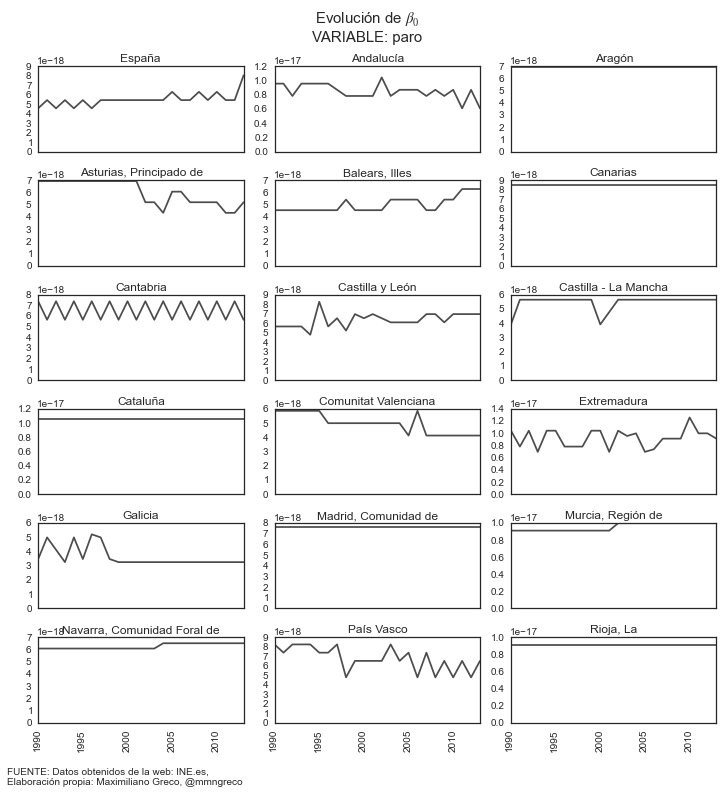

In [31]:
fig = plt.figure(figsize=(10,10))

#x, y = ['paro', 'empleo'], 'pib'
#id_x = 0  # 0 = paro, 1 = empleo ---> exogena
#var = x[id_x]

p = 'b0'
ttl= 'Evolución de $β_%s$\nVARIABLE: %s' % (p[-1], v)
file_name = 'evolucion_%s_%s.png' % (v, p)

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(6,3,i+1)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, sharex=True, color='black', alpha=0.7)
    plt.title(reg)
    plt.xticks(evolucion_okun.index[::5], evolucion_okun.index[::5], rotation=90)
    plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

plt.gcf().text(0, -0.03, "%s" % foot, fontsize=10, transform=(1,1))
plt.suptitle(x=0.5, y=1.05, t=ttl, fontsize=15)
plt.tight_layout()
# plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['bold'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


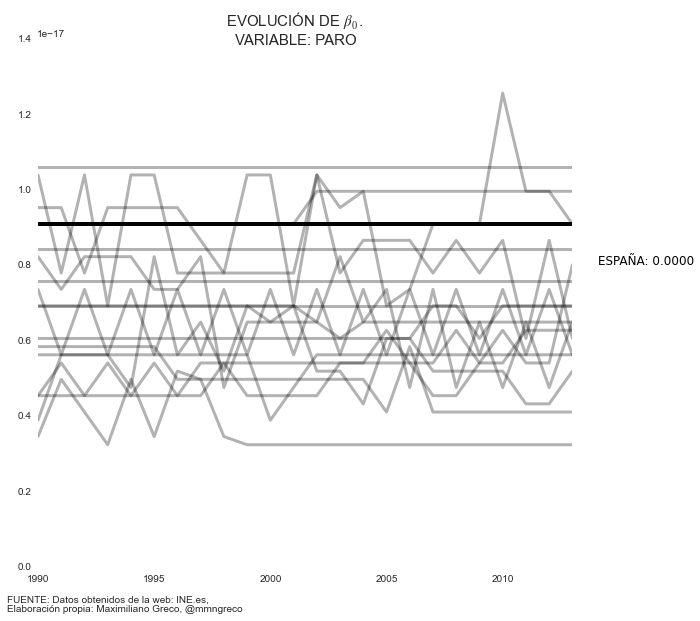

In [32]:
p = 'b0'
fig = plt.figure(figsize=(8,8), dpi=200)
ttl= 'EVOLUCIÓN DE $β_%s$.\nVARIABLE: %s' % (p[-1], v.upper())
file_name = 'evolucion_%s_%s_todas.png' % (v, p)
c = '#' + '000000'
c1 = '#' + '000000'

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(111)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=0.3, linewidth=3, color=c1)

evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=1, color=c, linewidth=4)

plt.xticks(evolucion_okun.index[::5])
plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)

ax.tick_params(axis='both',
               which='both',
               bottom='off',
               top='off',
               left='off',
               labelbottom='on',
               labelleft='on')

plt.text(2014.1, 
         evolucion_okun[p]['España'].values[-1], 
         'ESPAÑA: {:.4f}'.format(evolucion_okun[p]['España'].values[-1]),
         fontsize=12,
         family='bold',
         color=c)



plt.gcf().text(0, 
               -0.03, 
               "%s" % foot, 
               fontsize=10, 
               transform=(1,1))

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)

plt.tight_layout()
# plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)


[🏠INDICE: ](#INDICE:)

## OUTLIERS

In [29]:
# MCO: TASA PARO VS PIB

d = m

outliers_index = dict()

try:
    print('## OUTLIERS EN %s\n%s' % (v.upper(), nombre_xls[id_xls]))
except:
    print('## OUTLIERS EN %s\n%s' % (v.upper(), d_tipo))

for ca in regiones:
    outlier = d[ca].outlier_test()['bonf(p)']
    
    if (outlier < 0.05).any() > 0:
        print('###', ca)
        print(outlier[outlier < 0.05])
        print('\n---\n')
        outliers_index[ca] = outlier[outlier < 0.05].index[0] # añade para cada region el año correspondiente

print('Outliers encontrados: %s' % len(outliers_index))

## OUTLIERS EN PARO
log-tasa
### País Vasco
1980    0.03473
Name: bonf(p), dtype: float64

---

Outliers encontrados: 1


In [30]:
d = dwork.copy(deep=True)
y = 'pib'
try:
    print('REESTIMANDO:', v, '~', y, nombre_xls[id_xls])
except:
    print('REESTIMANDO:', v, '~', y, d_tipo)

for reg, year in outliers_index.items():
    d[v][reg].loc[year] = nan
    print(year, d[x[id_x]][reg].loc[year])


s, p, m = estimar_mco(d, endogena=y, exogena=v, regiones=regiones)

REESTIMANDO: paro ~ pib log-tasa
1980 nan


/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# BIBLIOGRAFÍA:

- [Estadisticas Robustas](link1)
- [Correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)
- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)
- [Criterio de Outliers](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico)


[link1]:https://en.wikipedia.org/wiki/Robust_statistics#Definition

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# Apéndice:

# Markdown Sintaxis:
- [Footnote](http://rephrase.net/box/word/footnotes/syntax/)
- [Sintaxis, guía](http://daringfireball.net/projects/markdown/syntax#link)

![](http://cdn.churchm.ag/wp-content/uploads/2014/01/markdown-cheatsheet.png)

# REGRESIÓN:

Método de estimación:
- MCO

## Statsmodels:
- [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- [Regression](http://statsmodels.sourceforge.net/devel/regression.html)
- [QT-filter](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.tsatools.detrend.html?highlight=trend#statsmodels.tsa.tsatools.detrend)
- [HP-filter](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_filters.html?highlight=trend)

## Linear Regresion
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- HP filter: [link](http://link.springer.com/article/10.1007%2FBF01205950)
- Patsy Formula: [link](https://patsy.readthedocs.org/en/latest/formulas.html)

# CORRELACIÓN:

## __Coeficiente de correlación de Pearson __:
_[Wikipedia, la enciclopedia libre](https://es.wikipedia.org/wiki/Correlaci%C3%B3n)_

En estadística, el coeficiente de correlación de Pearson es una medida de la relación lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas.


El coeficiente de correlación de Pearson se simboliza con la letra $\rho_{x,y}$, siendo la expresión que nos permite calcularlo:

## $$\rho_{X,Y}={\sigma_{XY} \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$$

Donde:

- $\sigma_{XY}$ es la covarianza de (X,Y)
- $\sigma_{X}$ es la desviación típica de la variable X
- $\sigma_{Y}$ es la desviación típica de la variable Y

## Para una muestra:

## $$r = r_{xy} =\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}$$


## EJEMPLOS DE CORRELACIONES

![corr2_img](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png)

# Test de Jarque-Bera

En estadística, el test de Jarque-Bera es una prueba de bondad de ajuste acerca de si una muestra de datos tiene la asimetría y la curtosis de una distribución normal. El test recibe el nombre de Carlos Jarque y Anil K. Bera.

El test estadístico JB se define como:


$$JB = \frac{n-k+1}{6} \left( S^2 + \frac14 (C-3)^2 \right)$$
  
donde n es el número de observaciones (o grados de libertad en general); S es la asimetría de la muestra, C la curtosis de la muestra y k el número de regresores:


$S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 }$
$= \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^3} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{3/2}}$

$ C = \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 }$
$    = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^4} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{2}} $

donde $\hat{\mu}_3$ y $\hat{\mu}_4$ son las estimaciones de los momentos centrales tercer y cuarto, respectivamente, $\bar{x}$ es la media de la muestra y $\hat{\sigma}^2$ es la estimación del segundo momento central, la varianza.

El estadístico de Jarque-Bera se distribuye asintóticamente como una distribución __chi cuadrado con dos grados de libertad__ y puede usarse para probar la __hipótesis nula__ de que los datos pertenecen a una distribución normal. La hipótesis nula es una __hipótesis conjunta__ de que la asimetría y la curtosis son nulas.



# Test de Breusch-Pagan

En estadística, el test de Breusch-Pagan se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal. Analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.

Supongamos que estimamos el siguiente modelo:


$y = \beta_0 + \beta_1 x + u$

y obtenemos un conjunto de valores para $\hat{u}$, los residuos. Con las restricciones de los Mínimos Cuadrados Ordinarios la media es 0, de modo que dada la suposición de que la varianza no depende de las variables independientes, la estimación de la varianza se puede obtener a partir de la media de los valores al cuadrado. Si la suposición no fuera correcta, podría ocurrir que la varianza estuviera relacionada linealmente con las variables independientes. Ese modelo se puede examinar haciendo una regresión de los residuos al cuadrado respecto de las variables independientes, empleando una ecuación de la forma:


$\hat{u}^2 = \gamma_0 + \gamma_1 x + v$

Esta es la base del test. Si el test-F confirma que las variables independientes son significativas, entonces se puede rechazar la __hipótesis nula__ de homocedasticidad.

# Estadístico de Durbin-Watson

En estadística, el estadístico de Durbin-Watson, desarrollado por el reputado economista Watson, es una estadística de prueba que se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de la regresión. Lleva el nombre de James Durbin y Geoffrey Watson. La pequeña muestra de la distribución de esta relación se deriva de John von Neumann (von Neumann, 1941). Durbin y Watson (1950, 1951) aplicaron esta estadística para los residuales de mínimos cuadrados, y desarrollaron pruebas para la hipótesis nula de que los errores están correlacionados en serie frente a la alternativa de que siguen un proceso de primer orden autorregresivo. Más tarde, John Denis Sargan y Alok Bhargava desarrollaron varias pruebas estadísticas del tipo Neumann-Durbin-Watson von para la hipótesis nula de que los errores en un modelo de regresión siguen un proceso con una raíz unitaria contra la hipótesis alternativa de que los errores siguen un proceso estacionario de primer orden autorregresivo (Sargan y Bhargava, 1983).

## Cálculo e interpretación del estadístico de Durbin-Watson

Si et es el residual asociado a la observación en el tiempo t, entonces la prueba estadística es:

$d = {\sum_{t=2}^T (e_t - e_{t-1})^2 \over {\sum_{t=1}^T e_t^2}}$

Donde T es el número de observaciones. Puesto que d es aproximadamente igual a 2(1 − r), donde r es la autocorrelación de la muestra de los residuos,1 d = 2 indica que no hay autocorrelación. El valor de d siempre está entre -1 y 1,5. Si la estadística de Durbin-Watson es sustancialmente menor que 0,5, hay evidencia de correlación serial positiva. Como regla general, si Durbin-Watson es inferior a 1,0 aunque lo óptimos es que sea menor que 0, puede ser causa de alarma. Los valores pequeños de d indican los términos de error sucesivos son, en promedio, cerca del valor de los otros, o correlacionados positivamente. Si d> 2, los términos de error sucesivas son, en promedio, muy diferente en valor el uno del otro, es decir, correlacionada negativamente. En las regresiones, esto puede implicar una subestimación del nivel de significación estadística.

Para probar la __autocorrelación positiva__ en importancia α, la estadística de prueba d se compara con los valores críticos inferiores y superiores (dL,α and dU,α):

- Si d < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si d > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si dL,α < d < dU,α, la prueba no es concluyente.

Correlación serial positiva es la correlación en serie en la que un error positivo para una observación aumenta las posibilidades de un error positivo para otra observación.

Para probar la autocorrelación negativa en significación α, la estadística de prueba (4 - d) se compara a bajar y los valores críticos de nivel superior (dL,α and dU,α):

- Si (4 − d) < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si (4 − d) > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si dL,α < (4 − d) < dU,α, la prueba no es concluyente.

Correlación serial negativa implica que un error positivo para una observación aumenta la probabilidad de un error negativo para otra observación y un error negativo para uno aumenta las posibilidades de un error positivo para otra observación.

Los valores críticos, dL,α y dU,α, variar según el nivel de significación (α), el número de observaciones, y el número de predictores en la ecuación de regresión. Su derivación es compleja-los estadísticos suelen obtener a partir de los apéndices de textos estadísticos.

# Python

- [format](https://mkaz.com/2012/10/10/python-string-format/)

In [71]:
!open imgs

In [9]:
!subl3 .

In [32]:
def crea_link_md(texto, *texto_enlace):
    '''
    Crea enlace local con formato markdown para un string, o lista de string.
    '''
    if len(texto_enlace) > 0:
        texto_enlace = texto_enlace[0]
        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[{}](#{})'.format(texto_enlace, t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list) and len(texto) == len(texto_enlace):
            ret = dict()
            for i, t in enumerate(texto):
                link = '[{}](#{})'.format(texto_enlace[i], t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret
        else:
            print(len(texto) == len(texto_enlace), '{} != {}\n{}\t{}'.format(len(texto), len(texto_enlace), texto, texto_enlace))
    else:

        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[](#{})'.format(t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list):
            ret = dict()
            for t in texto:
                link = '[](#{})'.format(t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret




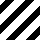
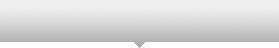
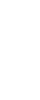
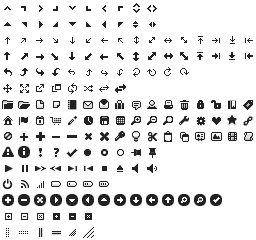
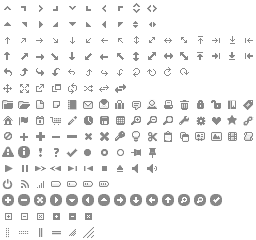
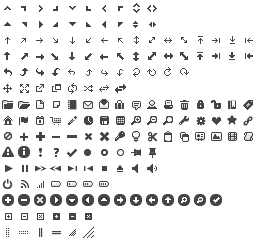
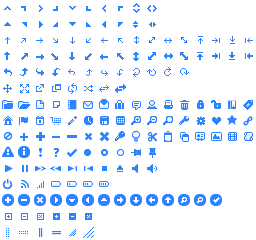
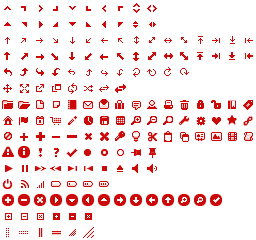
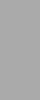
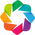
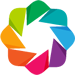
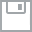
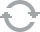
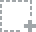
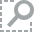
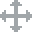
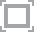
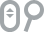

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [138]:
import bokeh.plotting as bkh
from bokeh import mpl

bkh.output_notebook()

ppl.plot(dwork.empleo, linewidth=3)
plt.xticks(dwork.index)
plt.legend(loc='upper left')
bkh.show(mpl.to_bokeh())

http://bokeh.pydata.org/en/latest/docs/reference/charts.html%23bokeh-charts

# GIT WORK-FLOW

In [74]:
datetime.now()

datetime.datetime(2015, 9, 14, 19, 0, 25, 408202)

In [76]:
%%!
git add .
git commit -a -m 'update 9.14.1900'
git pushorigin master

['[master 146e1b5] update 9.14.1900',
 ' 1 file changed, 20 insertions(+), 14 deletions(-)',
 "git: 'pushorigin' is not a git command. See 'git --help'."]